In [248]:
# Загружаем библиотеки:
# Для работы с данными
import pandas as pd
# Для построения графиков
import matplotlib.pyplot as plt
# Для разделения выборки на тренировочную и тестовую
from sklearn.model_selection import train_test_split
# Для линейного дискриминантного анализа
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
# Для кластеризации, метод К-средних
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [40]:
# Загружаем данные для анализа
from sklearn.datasets import load_iris
iris = load_iris()
# Длина и ширина чашелистика
sepal = pd.DataFrame(iris['data'], columns = iris.feature_names)[['sepal length (cm)', 'sepal width (cm)']]
# Сорт ириса
# Модель LinearDiscriminantAnalysis не позволяет использовать DataFrame или Series!!!
variety = iris['target']

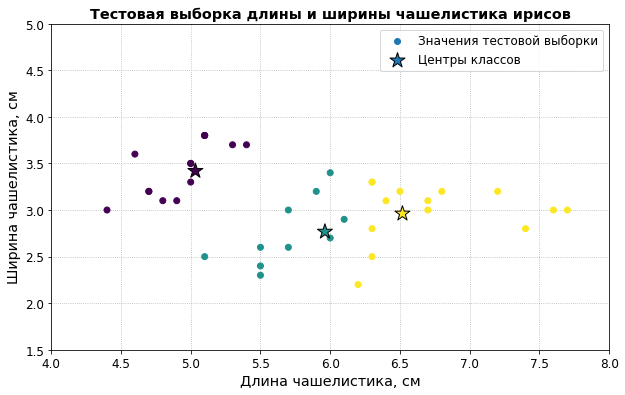

Точность модели 0.92


In [272]:
# Разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(sepal, variety, test_size = 0.25)
# Вызываем модель и обучаем её
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Размер поля графика
plt.figure(figsize = (10, 6))
# График визуализиции тестовой выборки
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c = lda.predict(X_test), zorder = 2,)
# Значения по осям
plt.xlim(4, 8) 
plt.ylim(1.5, 5) 
plt.grid(linestyle = ':')  
# Надписи по осям и название графика
plt.xlabel('Длина чашелистика, см', fontsize = 'x-large')
plt.ylabel('Ширина чашелистика, см', fontsize = 'x-large')
plt.title('Тестовая выборка длины и ширины чашелистика ирисов', fontsize = 'x-large', fontweight = 'bold')
plt.tick_params(labelsize = 'large')
# Центры классов
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c = [0, 1, 2], s = 250, marker = '*', zorder = 3, edgecolors = 'black')
# Легенда
plt.legend(['Значения тестовой выборки', 'Центры классов'], fontsize = 'large')

plt.show()
print(f'Точность модели {round(accuracy_score(y_test, lda.predict(X_test)), 2)}')

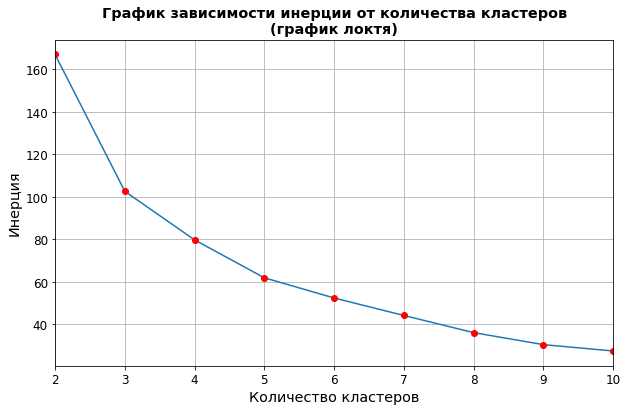

График локтя показывает, что оптимальное число кластеров 3, так как разница между 3, 4 и последующим количеством кластеров невелика по сравнению с разницей между 2 и 3 кластерами


In [277]:
# Кластеризация по методу К-средних

# Приведем данные к единому масштабу
scaler = StandardScaler()
sepal_scaled = scaler.fit_transform(sepal)

# Для выбора оптимального числа кластеров строим график локтя
# Значения инерций
k_inertia = []
# Диапазон кластеров
ks = range(2, 11)
# Строим график локтя
for k in ks:
    # Указываем количество кластеров для алгоритма
    kmeans = KMeans(n_clusters = k)
    # Обучаем модель
    clusters = kmeans.fit_predict(sepal_scaled)
    # Добавляем инерцию каждой модели в список
    k_inertia.append(kmeans.inertia_)
# График локтя
plt.figure(figsize = (10, 6))
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
plt.xlim(2, 10) 
plt.xticks(range(2, 11)) 
plt.tick_params(labelsize = 'large')
plt.grid()  
plt.xlabel('Количество кластеров', fontsize = 'x-large')
plt.ylabel('Инерция', fontsize = 'x-large')
plt.title('График зависимости инерции от количества кластеров\n(график локтя)', fontsize = 'x-large', fontweight = 'bold')

plt.show()
print('График локтя показывает, что оптимальное число кластеров 3, так как разница между 3, 4 и последующим количеством кластеров невелика по сравнению с разницей между 2 и 3 кластерами')

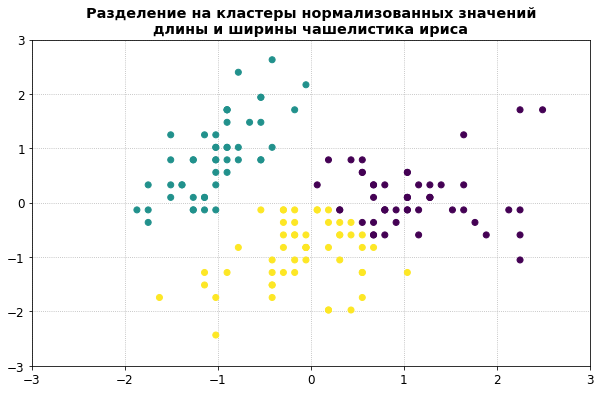

In [301]:
# Строим визуализацию для 3 кластеров

# Указываем количество кластеров
kmeans = KMeans(n_clusters = 3)
# Обучаем модель
clusters = kmeans.fit_predict(sepal_scaled)

# Строим график
plt.figure(figsize = (10, 6))
plt.scatter(sepal_scaled[:, 0], sepal_scaled[:, 1], c = clusters, zorder = 2)
plt.xlim(-3, 3) 
plt.ylim(-3, 3) 
plt.grid(linestyle = ':')  
plt.tick_params(labelsize = 'large')
plt.title('Разделение на кластеры нормализованных значений\nдлины и ширины чашелистика ириса', fontsize = 'x-large', fontweight = 'bold')

plt.show()